In [1]:
import pandas as pd
import requests
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler
%matplotlib inline
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDClassifier,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import h2o
from h2o.automl import H2OAutoML
import os


Using TensorFlow backend.


### Train Dataset

In [567]:
train_dataset=pd.read_csv('INPUT/diamonds_train.csv',index_col=0)
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)



In [524]:
train_dataset.shape

(40345, 10)

In [525]:
train_dataset.shape

(40345, 10)

In [526]:
40345-40179

166

In [527]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.01,Very Good,J,VS2,63.2,55.0,7.97,8.04,5.07,13596
1,0.33,Ideal,I,VVS2,62.7,54.0,4.45,4.42,2.78,743
2,0.70,Premium,G,VS1,61.0,59.0,5.77,5.68,3.49,2535
3,0.30,Ideal,G,VS2,62.2,57.0,4.26,4.32,2.67,526
4,0.52,Premium,G,VS2,61.7,58.0,5.16,5.14,3.18,1577


### Test Dataset

In [542]:
test_dataset=pd.read_csv('INPUT/diamonds_test.csv',index_col=0)

In [529]:
test_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [530]:
test_dataset.shape

(13449, 9)

# 1. Cleaning of the datasets

In [358]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [359]:
train_dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

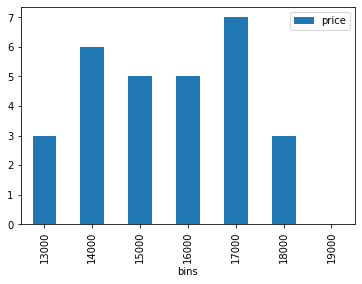

In [581]:
#visualization of the high priced diamonds distribution
train_dataset["bins"] = pd.cut(df.price, bins=[12000,13000,14000,15000,16000,17000,18000,19000],
                         labels=['13000','14000','15000','16000','17000','18000','19000'])

train_dataset[train_dataset.price>15000].groupby('bins').agg({'price':"count"}).plot.bar()

## Removing Outliars of some columns

I tried the high-value outliers of the y column.

In [65]:
'''#q_low = train_dataset["carat"].quantile(0.02)
q_hi  = train_dataset["carat"].quantile(0.99)
train_dataset = train_dataset[(train_dataset["carat"] < q_hi) ]#& (train_dataset["carat"] > q_low)]'''

In [543]:
q_low = train_dataset["y"].quantile(0.002)
q_hi  = train_dataset["y"].quantile(0.998)

train_dataset = train_dataset[(train_dataset["y"] < q_hi) & (train_dataset["y"] > q_low)]

In [528]:
'''q_low = train_dataset["x"].quantile(0.10)
q_hi  = train_dataset["x"].quantile(0.90)

train_dataset = train_dataset[(train_dataset["x"] < q_hi) & (train_dataset["x"] > q_low)]'''

In [529]:
'''q_low = train_dataset["z"].quantile(0.10)
q_hi  = train_dataset["z"].quantile(0.90)

train_dataset = train_dataset[(train_dataset["z"] < q_hi) & (train_dataset["z"] > q_low)]'''

## Transformation of categorical features in numeric values

In [244]:
'''train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['cut'], prefix='cut', drop_first=True)], axis=1)
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['color'], prefix='color', drop_first=True)], axis=1)
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['clarity'], prefix='clarity', drop_first=True)], axis=1)

test_dataset = pd.concat([test_dataset, pd.get_dummies(test_dataset['cut'], prefix='cut', drop_first=True)], axis=1)
test_dataset = pd.concat([test_dataset, pd.get_dummies(test_dataset['color'], prefix='color', drop_first=True)], axis=1)
test_dataset = pd.concat([test_dataset, pd.get_dummies(test_dataset['clarity'], prefix='clarity', drop_first=True)], axis=1)
train_dataset.drop(['cut', 'color', 'clarity'],axis=1,inplace=True)
test_dataset.drop(['cut', 'color', 'clarity'],axis=1,inplace=True)'''

In [557]:
cat_col=['cut', 'color', 'clarity']
train_dataset[cat_col]=train_dataset[cat_col].apply(LabelEncoder().fit_transform)
train_dataset.dtypes
train_dataset[cat_col]=train_dataset[cat_col]+1

In [558]:
test_dataset[cat_col]=test_dataset[cat_col].apply(LabelEncoder().fit_transform)
test_dataset[cat_col]=test_dataset[cat_col]+1
test_dataset.dtypes


carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [282]:
train_dataset.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut/wt', 'color/wt',
       'clarity/wt'],
      dtype='object')

##  0-value remotion of the columns x,y,z 

In [544]:
train_dataset.loc[(train_dataset['x']==0) | (train_dataset['y']==0)]
train_dataset=train_dataset.loc[(train_dataset['x']>0) | (train_dataset['y']>0)]
train_dataset.loc[18027,'x']=train_dataset['x'].median()
train_dataset.loc[18027,'z']=train_dataset['z'].median()
train_dataset.loc[(train_dataset['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
116,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
2214,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383
5625,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731
13314,2.25,Premium,I,SI1,61.3,58.0,8.52,8.42,0.0,15397
22475,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
22907,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
25333,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
26853,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
30410,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
39090,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696


## Filling missing z values with a linear model prediction

In [545]:
train_dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [ ]:
#filling z missing values with prediction of values with the other features
'''cols=['carat', 'depth', 'table', 'x', 'y', 
       'price', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
      'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']'''
'''cols=['carat', 'x', 'y',  'price', 'cut/wt', 'color/wt', 'clarity/wt',
       'depth/wt', 'table/wt']'''
cols=['carat', 'depth', 'table', 'x', 'y',  'price', 'cut', 'color',
       'clarity']
m=ElasticNet()
train_dataset_X=train_dataset.loc[0:10000,cols]
train_dataset_y=train_dataset.loc[0:10000,'z']
m.fit(train_dataset_X, train_dataset_y)
test_dataset1=train_dataset.loc[(train_dataset['z']==0),cols]                                 
y_pred=m.predict(test_dataset1)

train_dataset.loc[train_dataset['z']==0,'z']=y_pred
train_dataset.loc[(train_dataset['z']==0)]
train_dataset=train_dataset.loc[~(train_dataset['y']>30)|(train_dataset['z']>30)]
train_dataset=train_dataset.loc[~(train_dataset['carat']>5)]



## Transforming x,y,z, in volume

I did not use this transformation in the final solution

In [547]:
'''train_dataset['volume']=train_dataset['x']*train_dataset['y']*train_dataset['z']
test_dataset['volume']=train_dataset['x']*train_dataset['y']*train_dataset['z']'''

In [ ]:
'''train_dataset['volume']=train_dataset['x']*train_dataset['y']*train_dataset['z']
test_dataset['volume']=test_dataset['x']*train_dataset['y']*train_dataset['z']
train_dataset.drop(['x','y','z'],axis=1,inplace=True)
test_dataset.drop(['x','y','z'],axis=1,inplace=True)'''

## Reducing the dimensions with PCA

I did not use this in the final solution

In [249]:
'''#reduce x,y,z as a unique variable using PCA
cols=[ 'cut_Good', 
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']
pca = PCA(n_components=3, random_state=123) 
pca.fit(train_dataset[cols])
princ_comp = pca.transform(train_dataset[cols])
pca.explained_variance_ratio_.round(9)'''

array([0.15282418, 0.10949211, 0.10376446])

In [250]:
'''pca.fit(test_dataset[cols])
princ_comp = pca.transform(test_dataset[cols])
pca.explained_variance_ratio_.round(9)
test_dataset.drop(cols,axis=1,inplace=True)
princ_comp=pd.DataFrame(princ_comp)
test_dataset['1pca']=princ_comp[0]
test_dataset['2pca']=princ_comp[1]'''

In [251]:
'''train_dataset.drop(cols,axis=1,inplace=True)
princ_comp=pd.DataFrame(princ_comp)
train_dataset['1pca']=princ_comp[0]
train_dataset['2pca']=princ_comp[1]'''

## correlation check 

In [131]:
corr_ma = train_dataset.corr()
corr_ma[corr_ma>0.8]

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,NaN,NaN,NaN,NaN,NaN,0.969105,0.968813,0.971629,0.914668
cut,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
x,0.969105,NaN,NaN,NaN,NaN,NaN,1.000000,0.998606,0.990354,0.886625
y,0.968813,NaN,NaN,NaN,NaN,NaN,0.998606,1.000000,0.990177,0.888370
z,0.971629,NaN,NaN,NaN,NaN,NaN,0.990354,0.990177,1.000000,0.881199
price,0.914668,NaN,NaN,NaN,NaN,NaN,0.886625,0.888370,0.881199,1.000000


x,y,z,are highly correlated with the price

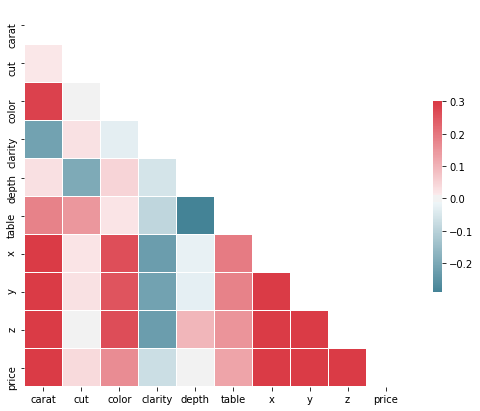

In [16]:
mask = np.zeros_like(corr_ma, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_ma, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

price, carat, x, y, z are quite correlated, while table has a very small correlation of 0.127, is not very informative to predict the cost of a diamond.
 

## Scatter plots of the realtions between features

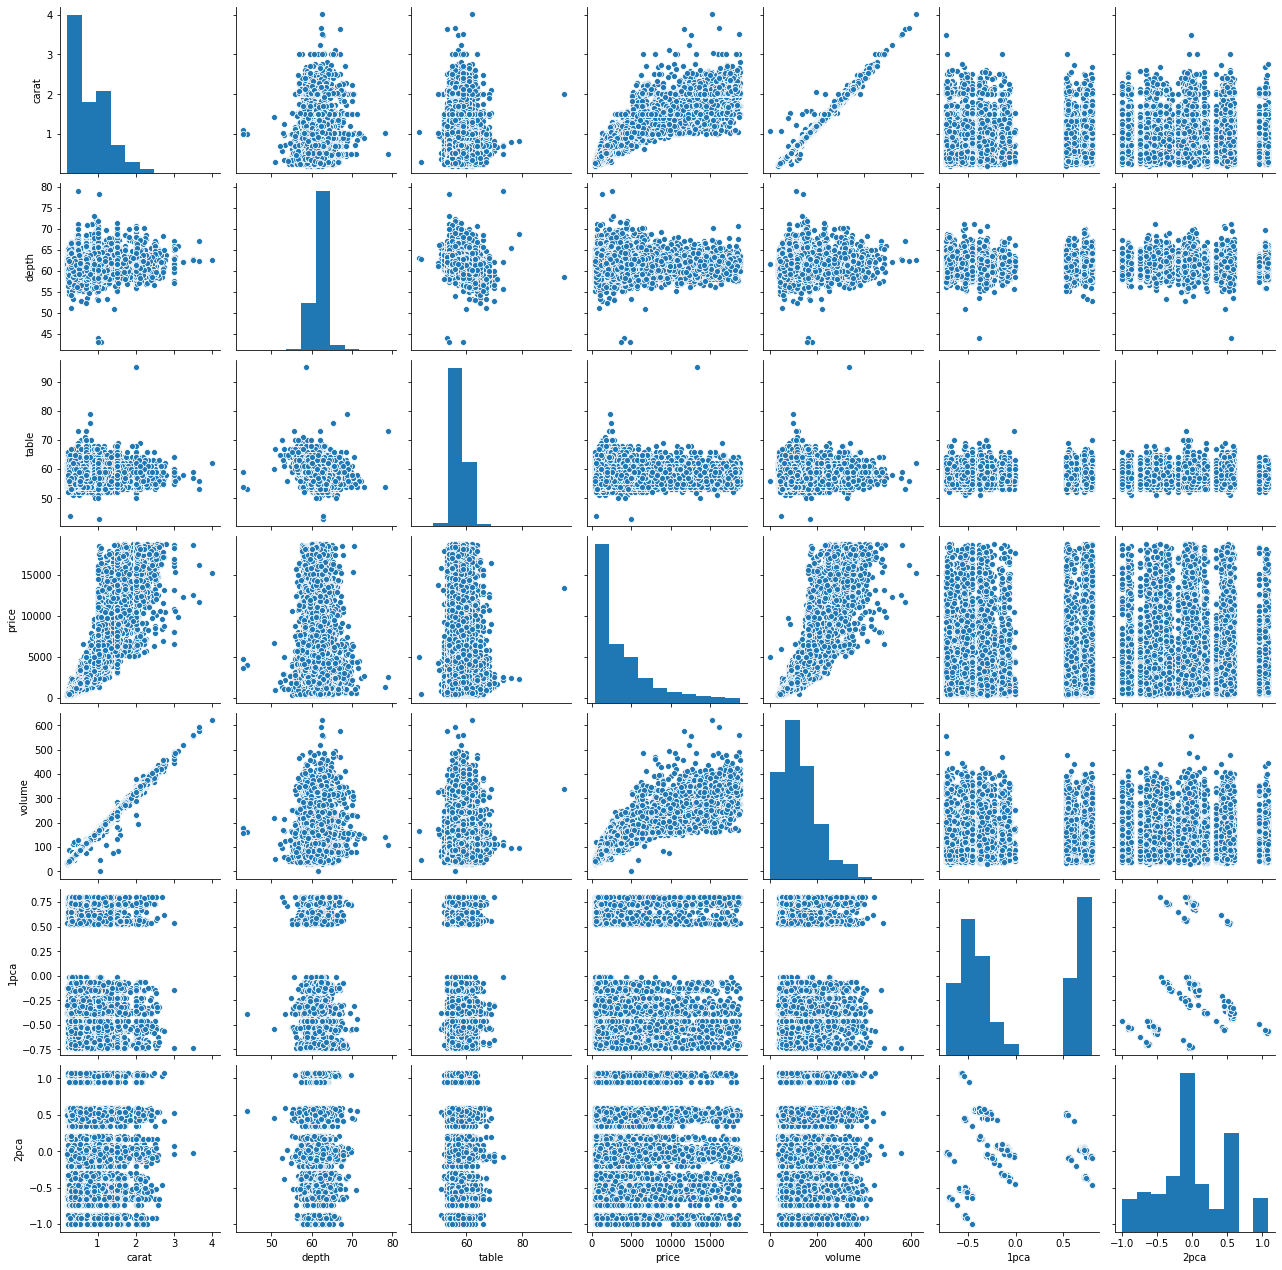

In [252]:

sns.pairplot(train_dataset)


From the correlation matrix we can see that there's a strong relationship between price and carat,x,y,z. but from the scatter plot matrix we can see a non linear relation (quadratic or exponential relation) between price and carat, price and x, price and y, price and z. 

## Log Transformation of the column price

In [518]:
#applying log transformation to make the relation linear
#pd.set_option('mode.chained_assignment', None)
train_dataset['logprice']=np.log(train_dataset['price'])


In [519]:
train_dataset['price']=train_dataset['logprice']
train_dataset.drop('logprice',axis=1,inplace=True)

In [155]:
#I also tried to make more linear the relation between carat and price, but the model did not perform better.
'''def trasf(x):
    return x**(1/3)
train_dataset['carat']=train_dataset['carat'].apply(trasf)
test_dataset['carat']=test_dataset['carat'].apply(trasf)'''

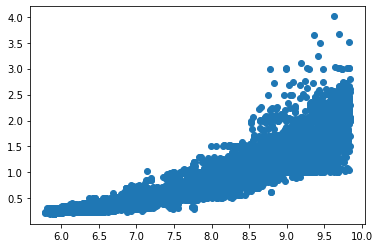

In [78]:
plt.scatter(train_dataset['price'],train_dataset['carat'])

## Column 'cut' exploration

In [400]:
train_dataset['cut'].value_counts()

2.000000    16087
3.000000    10329
4.000000     9035
1.000000     3691
0.000000     1185
3.971973       10
Name: cut, dtype: int64

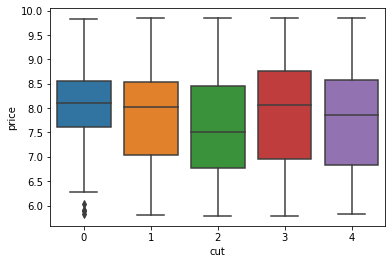

In [224]:
sns.boxplot(x='cut', y='price', data=train_dataset)

It doesn't seem very cerrelated with price

# 3. Standardization of the numerical features of the database

I did't standardize the column in the final solution.

In [ ]:
'''pipeline = [
    StandardScaler(),  
    #Normalizer()
    ]
'''numerical_features = ['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'x','y','z']'''
numerical_features =['carat',  'cut/wt', 'color/wt', 'clarity/wt', 'depth/wt',
       'table/wt', 'volume']
#numerical_features=['carat', 'depth', 'table',  'volume', '1pca', '2pca']
tr = make_pipeline(*pipeline)

train_dataset.loc[:, numerical_features]  = tr.fit_transform(train_dataset[numerical_features])


train_dataset'''

In [ ]:
'''train_dataset.isnull().sum()
train_dataset.dropna(inplace=True)
train_dataset.isnull().sum()'''

In [ ]:
'''#standarization of test dataset numerical features
Xpr = tr.fit_transform(test_dataset[numerical_features])

test_dataset.loc[:, numerical_features]  = tr.fit_transform(test_dataset[numerical_features])
test_dataset'''

# 4.Train-test separation

In [559]:
train_dataset.dropna(inplace=True)

In [560]:
'''train_dataset_X=train_dataset[['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'x','y','z']]'''
#train_dataset_X=train_dataset[['carat', 'cut/wt', 'color/wt', 'clarity/wt', 'depth','table', 'x','y','z']]
train_dataset_X=train_dataset[['carat', 'cut', 'color', 'clarity', 'depth', 'table',  'x','y','z']]
#train_dataset_X=train_dataset[['carat', 'depth', 'table','volume', '1pca', '2pca']]
train_dataset_y=train_dataset['price']
X_train, X_test, y_train, y_test = train_test_split(train_dataset_X, train_dataset_y, test_size = 0.2, random_state = 0)

# 5. Selection of the best model

I tried many different models. The best performin was Random Forest

In [561]:

models = {
    
    #"SGD": SGDRegressor( loss="squared_loss", penalty="l2", max_iter=5),
    #"AdaBoost": AdaBoostRegressor( ),
    "RandomForest70":RandomForestRegressor(bootstrap=True,max_depth=70,
                            max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=700),
    #"RandomForest2":RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
    #                  max_depth=110, max_features=3, max_leaf_nodes=None,
      #                max_samples=None, min_impurity_decrease=0.0,
       #               min_impurity_split=None, min_samples_leaf=3,
        #              min_samples_split=8, min_weight_fraction_leaf=0.0,
         #             n_estimators=1000, n_jobs=None, oob_score=False,
          #            random_state=None, verbose=0, warm_start=False),
    #"RandomForest100":RandomForestRegressor(n_estimators=40,random_state=42),
    #"RidgeCV":RidgeCV(alphas=[1, 1e3, 1e6], store_cv_values=True),
    #"DecisionTree":DecisionTreeRegressor(random_state = 0),
    #"GradientBoosting":GradientBoostingRegressor(max_depth=70,n_estimators=100),
    "Bagging":BaggingRegressor(n_estimators=10)}
    #"LinearRegression":LinearRegression(),
    #'DecisionTree':DecisionTreeRegressor(),
    #"Ridge":Ridge(),
    #"Lasso":Lasso(alpha=10),
    #"ElasticNet":ElasticNet(),
    #"SGD":SGDRegressor(),
    #"SVR":SVR(),
    #"KNeighborsRegressor":KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2,weights = 'distance')}
    #"NNmodel":NNmodel()}
    #"HistGradientBoostingClassifier":HistGradientBoostingClassifier()}

# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Training complete")

Training RandomForest70...
Training Bagging...
Training complete


##  Tentative with a Neural Networks model

In [ ]:
def NNmodel():
    model = Sequential()
    # add 1st layer
    model.add(Dense(output_dim=128, input_dim=23, activation='relu')) # kernel_initializer='normal',
    # add hidden layer
    model.add(Dense(output_dim=256, kernel_initializer='normal', activation='relu'))
    # add output layer
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    model.summary()
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['acc','mse'])
    return model
modelnn=NNmodel()
history = modelnn.fit(X_train,y_train,batch_size=64,epochs=1000,verbose=2,validation_data=(X_test.values,y_test.values),shuffle=True)
#test=modelnn.evaluate(X_test, y_test, verbose=1)

## Metrics comparison for the models

In [403]:
y_predl=None
predictions={}
y_testl=np.exp(y_test)
errors={"model":[],"Root mean squared error":[],'mean_absolute_error':[]}
for modelName, model in models.items(): 
    if modelName=='NNmodel':
        errors["model"].append(modelName)
        errors["Root mean squared error"].append(mean_squared_error(y_testl,y_predl))
        errors['mean_absolute_error'].append(mean_absolute_error(y_testl,y_predl))
    else:
        y_pred = model.predict(X_test)
        y_predl=np.exp(y_pred)
        predictions[modelName]=y_predl
        #print(f"Evaluating model [{modelName}]:")
        #print("Mean Square Error",mean_squared_error(y_test,y_pred) )
        #print("Root mean squared error", model.score(X_test,y_test) )
        errors["model"].append(modelName)
        errors['mean_absolute_error'].append(mean_absolute_error(y_testl,y_predl))
        errors["Root mean squared error"].append(mean_squared_error(y_testl, y_predl,squared=False))


pd.DataFrame(errors).sort_values(by='Root mean squared error')

,model,Root mean squared error,mean_absolute_error
0,RandomForest70,564.319403,279.368093
1,Bagging,587.550957,293.311060


# 6.Training of the selected model with the whole dataset

In [ ]:
#train the model with the whole dataset
m=RandomForestRegressor(bootstrap=True,max_depth=70,
                            max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=700)

#train_dataset_X=train_dataset[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'dimensions']]
train_dataset_X=train_dataset[['carat', 'depth', 'table', 'x', 'y', 'z',  'cut/wt', 'color/wt',
       'clarity/wt']]


'''train_dataset_X=train_dataset[['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'dimensions']]'''

train_dataset_y=train_dataset['price']
m.fit(train_dataset_X, train_dataset_y)
y_pred1=m.predict(test_dataset)

# 7. Saving to CSV

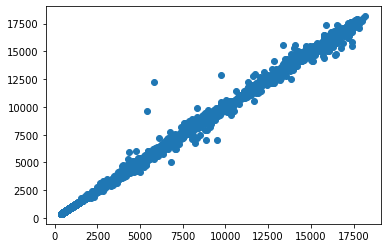

In [86]:
#Before saving I check the current solution vs my best submitted solution, 
fil=pd.read_csv('submissionDoubleModelCarat98.csv')
y_pred2=np.exp(y_pred1)
fil.shape
plt.scatter(y_pred2,fil['price'])

In [87]:
df=pd.DataFrame(y_pred2)
df=df.reset_index()
df.columns=('Id','price')
df[['Id', 'price']].to_csv('submission533Sicurologprice.csv',index=False)


# 8. Model parameters optimization

## First tentative with Grid Search

In [338]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [340]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


In [342]:
grid_accuracy = evaluate(best_grid, X_test, y_test)
best_grid

Model Performance
Average Error: 0.0726 degrees.
Accuracy = 99.05%.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [343]:
grid_accuracy

99.05406019370986

## Second tentative qith RandomizedSearchCV

In [ ]:
import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

# 9. AutoML approach

In [566]:
h2o.init(ip="localhost", port=54323)

# Load data into H2O
train_dataset1 = h2o.H2OFrame(train_dataset)
test_dataset1 = h2o.H2OFrame(test_dataset)

cols=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       ]
train,test=train_dataset1.split_frame(ratios=[.8])

X_train = train[cols]
y_train=train['price']
X_test = test[cols]
y_test=test['price']


y='price'


aml = H2OAutoML(max_models=15, seed = 1,nfolds=0 )
aml.train(y = y, x=cols, training_frame = train, validation_frame = test)

aml.leaderboard

pred=aml.leader.predict(test_dataset1)
y_pred=pred.as_data_frame(use_pandas=True)
results=pd.DataFrame()


Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,2 hours 26 mins
H2O_cluster_timezone:,Europe/Rome
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_silviaserafini_dv97v1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,0
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Total input file size of 1.9 MB is much larger than total cluster memory of Zero  , please use either a larger cluster or smaller data.
  Request: POST /3/Parse
    data: {'destination_frame': 'Key_Frame__upload_96eba1c695721b81e803cc8259cd4b9f.hex', 'parse_type': 'CSV', 'separator': '44', 'single_quotes': 'False', 'check_header': '1', 'number_columns': '10', 'chunk_size': '4194304', 'delete_on_done': 'True', 'blocking': 'False', 'column_types': '["Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric"]', 'column_names': '["carat","cut","color","clarity","depth","table","x","y","z","price"]', 'source_frames': '["upload_96eba1c695721b81e803cc8259cd4b9f"]'}


In [493]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_4_AutoML_20200511_192025,0.00787582,0.0887458,0.00787582,0.0629885,0.0101278
GBM_3_AutoML_20200511_192025,0.007943,0.0891235,0.007943,0.0631512,0.0101691
XGBoost_grid__1_AutoML_20200511_192025_model_2,0.00815757,0.0903193,0.00815757,0.0659603,0.0102598
GBM_grid__1_AutoML_20200511_192025_model_1,0.00819107,0.0905045,0.00819107,0.0636568,0.0103218
GBM_2_AutoML_20200511_192025,0.00819146,0.0905067,0.00819146,0.0638325,0.0103416
XGBoost_grid__1_AutoML_20200511_192025_model_3,0.00824774,0.0908171,0.00824774,0.0645728,0.0103858
GBM_5_AutoML_20200511_192025,0.00826322,0.0909023,0.00826322,0.0637762,0.0104309
XGBoost_grid__1_AutoML_20200511_192025_model_1,0.0083334,0.0912874,0.0083334,0.0666092,0.0103742
GBM_1_AutoML_20200511_192025,0.00839942,0.0916483,0.00839942,0.0655946,0.0105177
XGBoost_3_AutoML_20200511_192025,0.00866768,0.0931004,0.00866768,0.0656989,0.0106659


In [494]:
results=pd.DataFrame(y_pred)
results=results.reset_index()
results.columns=('Id','price')
df[['Id', 'price']].to_csv('submissionAutoML1.csv',index=False)
